## Library imports & Dataset loading

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

database = "Chinook_Sqlite.sqlite"

In [136]:
conn = sqlite3.connect(database)

In [137]:
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print(tables)

for table in tables:
    table_name = table[0]
    print(f"\nSchema for table {table_name}:")
    cursor.execute(f"PRAGMA table_info({table_name});")
    for col in cursor.fetchall():
        print(col)


[('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]

Schema for table Album:
(0, 'AlbumId', 'INTEGER', 1, None, 1)
(1, 'Title', 'NVARCHAR(160)', 1, None, 0)
(2, 'ArtistId', 'INTEGER', 1, None, 0)

Schema for table Artist:
(0, 'ArtistId', 'INTEGER', 1, None, 1)
(1, 'Name', 'NVARCHAR(120)', 0, None, 0)

Schema for table Customer:
(0, 'CustomerId', 'INTEGER', 1, None, 1)
(1, 'FirstName', 'NVARCHAR(40)', 1, None, 0)
(2, 'LastName', 'NVARCHAR(20)', 1, None, 0)
(3, 'Company', 'NVARCHAR(80)', 0, None, 0)
(4, 'Address', 'NVARCHAR(70)', 0, None, 0)
(5, 'City', 'NVARCHAR(40)', 0, None, 0)
(6, 'State', 'NVARCHAR(40)', 0, None, 0)
(7, 'Country', 'NVARCHAR(40)', 0, None, 0)
(8, 'PostalCode', 'NVARCHAR(10)', 0, None, 0)
(9, 'Phone', 'NVARCHAR(24)', 0, None, 0)
(10, 'Fax', 'NVARCHAR(24)', 0, None, 0)
(11, 'Email', 'NVARCHAR(60)', 1, None, 0)
(12, 'SupportRepId', 'INTEGER', 0, None, 0)

Schem

## Top Selling Artist

In [138]:
df = pd.read_sql_query("""SELECT Ar.Name, count(*) as 'Sales'
                        FROM InvoiceLine as I
                        JOIN Track as T ON I.TrackId = T.TrackId
                        JOIN Album as A ON A.AlbumId = T.AlbumId
                        JOIN Artist as Ar ON A.ArtistId = Ar.ArtistId
                        GROUP BY Ar.ArtistId
                        ORDER BY Sales DESC 
                        LIMIT 1;
                       """, conn)
df

,Name,Sales
0,Iron Maiden,140


## Top Selling Album

In [139]:
df = pd.read_sql_query("""SELECT Title, count(*) as 'Sales'
                        FROM InvoiceLine as I
                        JOIN Track as T ON I.TrackId = T.TrackId
                        JOIN Album as A ON A.AlbumId = T.AlbumId
                        GROUP BY A.AlbumId
                        ORDER BY Sales DESC 
                        LIMIT 1;
                       """, conn)
df

,Title,Sales
0,Minha Historia,27


## Top Selling Track

In [140]:
df = pd.read_sql_query("""SELECT Name, count(*) as 'Sales'
                        FROM InvoiceLine as I JOIN Track as T
                        ON I.TrackId = T.TrackId
                        GROUP BY Name
                        ORDER BY Sales
                        DESC LIMIT 1;
                       """, conn)
df

,Name,Sales
0,The Trooper,5


## Revenue Per Country

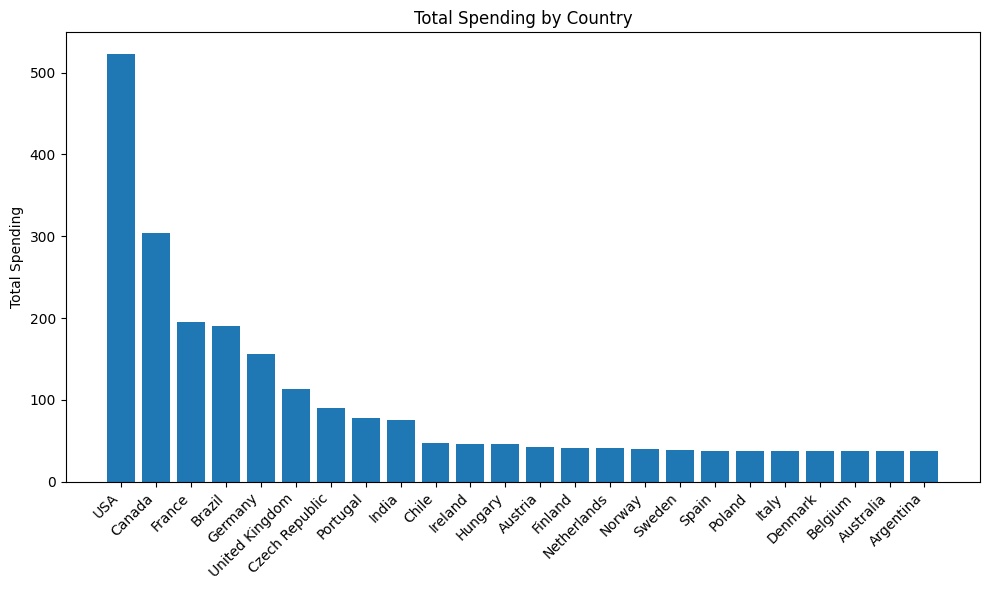

In [141]:
df = pd.read_sql_query("""SELECT BillingCountry as 'Country', sum(Total) as 'Revenue'
                       FROM Invoice
                       GROUP BY BillingCountry
                       ORDER BY Revenue DESC;
                       """, conn)  

df_sorted = df.sort_values("Revenue", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(df_sorted["Country"], df_sorted["Revenue"])
plt.title("Total Spending by Country")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

In [142]:
df = pd.read_sql_query("SELECT * FROM Invoice;", conn)  
df

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


## Monthly Revenue Performance

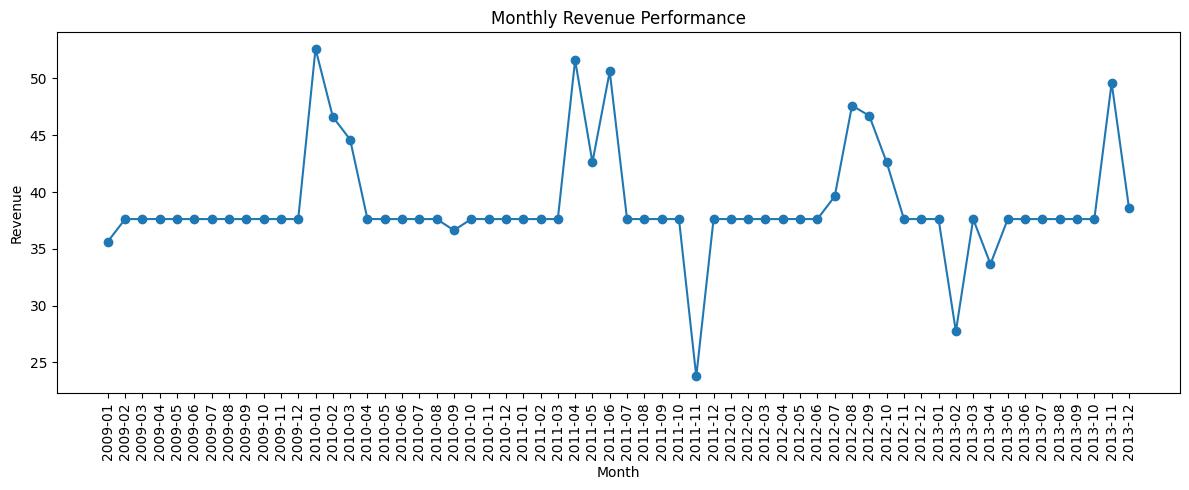

In [143]:
df = pd.read_sql_query("""SELECT strftime('%Y-%m', InvoiceDate) as 'Month', sum(Total) as 'Revenue'
                       FROM Invoice
                       GROUP BY Month
                       ORDER BY Month;
                       """, conn)  

plt.figure(figsize=(12,5))
plt.plot(df["Month"], df["Revenue"], marker="o")
plt.xticks(rotation=90)
plt.title("Monthly Revenue Performance")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()